In [47]:
from util import data_exploration
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [49]:
for column in energy_df:
    all_zeros_or_null = (energy_df[column] == 0) | pd.isnull(energy_df[column])
    print(column, ": ", all_zeros_or_null.all())

time :  False
generation biomass :  False
generation fossil brown coal/lignite :  False
generation fossil coal-derived gas :  True
generation fossil gas :  False
generation fossil hard coal :  False
generation fossil oil :  False
generation fossil oil shale :  True
generation fossil peat :  True
generation geothermal :  True
generation hydro pumped storage aggregated :  True
generation hydro pumped storage consumption :  False
generation hydro run-of-river and poundage :  False
generation hydro water reservoir :  False
generation marine :  True
generation nuclear :  False
generation other :  False
generation other renewable :  False
generation solar :  False
generation waste :  False
generation wind offshore :  True
generation wind onshore :  False
forecast solar day ahead :  False
forecast wind offshore eday ahead :  True
forecast wind onshore day ahead :  False
total load forecast :  False
total load actual :  False
price day ahead :  False
price actual :  False


0        28251.0
1        27818.0
2        26796.0
3        25223.0
4        24620.0
          ...   
35059    26415.0
35060    25213.0
35061    23987.0
35062    22748.0
35063    22605.0
Length: 35064, dtype: float64


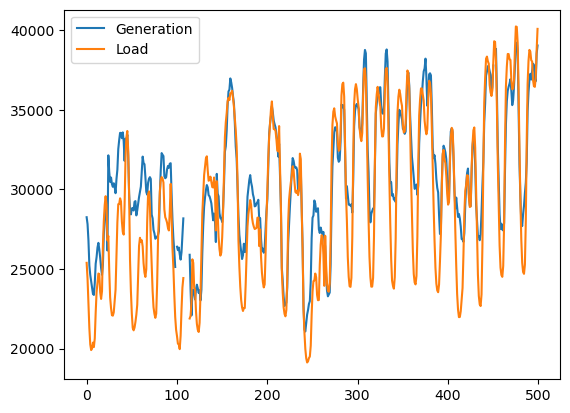

In [50]:
sum_of_generation = energy_df["generation biomass"]+ energy_df["generation fossil brown coal/lignite"]+ energy_df["generation fossil gas"]+energy_df["generation fossil hard coal"]+energy_df["generation fossil oil"]+ energy_df["generation hydro pumped storage consumption"]+energy_df["generation hydro run-of-river and poundage"]+energy_df["generation hydro water reservoir"]+energy_df["generation nuclear"]+energy_df["generation other"]+energy_df["generation other renewable"]+energy_df["generation solar"]+energy_df["generation waste"]+energy_df["generation wind onshore"]
print(sum_of_generation)

# Plotting generation vs laod actual
plt.plot(sum_of_generation[:500], label="Generation")
plt.plot(energy_df['total load actual'][:500], label="Load")
plt.legend()
plt.show()

In [51]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [52]:
data = pd.merge(energy_df, weather_df, left_on='time', right_on='dt_iso')
#print(data.dtypes)
print("gjøøøøør noe")
print(pd.to_datetime(data["time"]))
data["time"] = pd.to_datetime(data["time"] ,utc=True)

data.set_index('time', inplace=True)
data.head()
#data.index = pd.to_datetime(data.index)


# Check for duplicate columns
duplicates = data.columns.duplicated()
if any(duplicates):
    print("Duplicate columns found. Check the column names.")
    data = data.loc[:, ~duplicates]


# Check if 'city_name' and 'price actual' are available
print(data.columns)
print("hhaudhadhuashd", data.index)

data

gjøøøøør noe
0         2015-01-01 00:00:00+01:00
1         2015-01-01 00:00:00+01:00
2         2015-01-01 00:00:00+01:00
3         2015-01-01 00:00:00+01:00
4         2015-01-01 00:00:00+01:00
                    ...            
178391    2018-12-31 23:00:00+01:00
178392    2018-12-31 23:00:00+01:00
178393    2018-12-31 23:00:00+01:00
178394    2018-12-31 23:00:00+01:00
178395    2018-12-31 23:00:00+01:00
Name: time, Length: 178396, dtype: object
Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'gene

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,...,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,...,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,...,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [53]:
# we are looking at predicting power usage, only look at total load actually
total_load_df = data[["total load actual"]]
total_load_df.head()
index_data_type = total_load_df.index.astype(str)
print(index_data_type)

total_load_df["month"]= total_load_df.index.month
total_load_df["weekday"]= total_load_df.index.weekday
total_load_df["hour"]= total_load_df.index.hour

total_load_df
#total_load_df['month'] = total_load_df.index.month
# codes_bt['weekday'] = codes_bt.index.weekday
# codes_bt['hour'] = codes_bt.index.hour
# codes_bt


Index(['2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
       '2014-12-31 23:00:00+00:00', '2014-12-31 23:00:00+00:00',
       '2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
       '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
       '2015-01-01 00:00:00+00:00', '2015-01-01 00:00:00+00:00',
       ...
       '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
       '2018-12-31 21:00:00+00:00', '2018-12-31 21:00:00+00:00',
       '2018-12-31 21:00:00+00:00', '2018-12-31 22:00:00+00:00',
       '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00',
       '2018-12-31 22:00:00+00:00', '2018-12-31 22:00:00+00:00'],
      dtype='object', name='time', length=178396)


/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_27069/481714801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["month"]= total_load_df.index.month
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_27069/481714801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["weekday"]= total_load_df.index.weekday
/var/folders/5c/kj6yt0yn1tlgdrljzqyqr5jc0000gn/T/ipykernel_27069/481714801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,total load actual,month,weekday,hour
time,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2014-12-31 23:00:00+00:00,25385.0,12,2,23
...,...,...,...,...
2018-12-31 22:00:00+00:00,24455.0,12,0,22
2018-12-31 22:00:00+00:00,24455.0,12,0,22
2018-12-31 22:00:00+00:00,24455.0,12,0,22


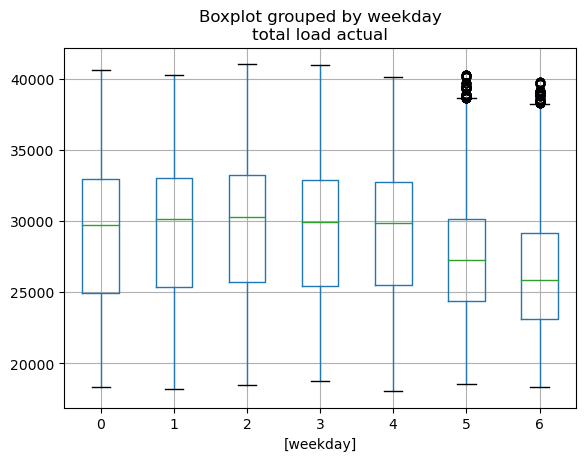

In [54]:
total_load_df[['weekday', 'total load actual']].boxplot(by='weekday');
# down in weekends

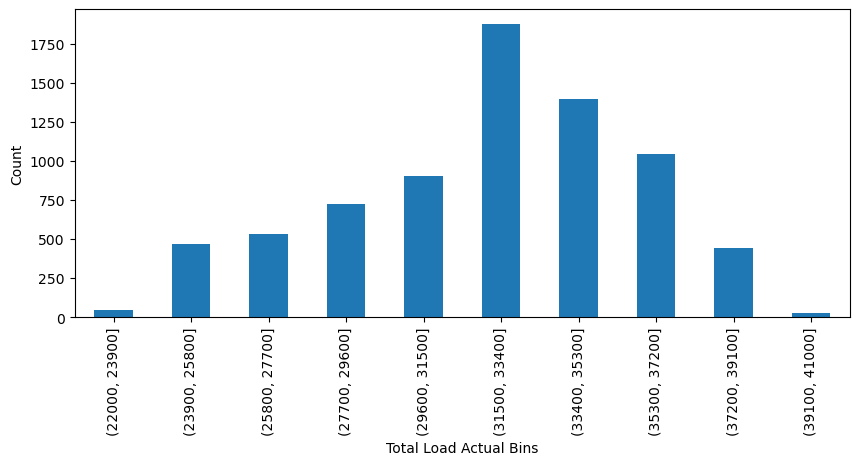

In [55]:
#The distribution shown in your bar chart looks more like a normal distribution, as it has a single peak and tails off on both sides of the peak, suggesting that most of the data points are around a central value with fewer occurrences towards the extremes. However, without a smoother curve or more granular data, it's difficult to definitively classify the distribution type just from a bar chart.


# import matplotlib.pyplot as plt
import pandas as pd

# Assuming total_load_df is already defined and has a DateTimeIndex

# Filter to include only entries at 10:00 AM
ten_am_load = total_load_df[total_load_df.index.hour == 10].copy()  # Make a copy to avoid the warning

# Define the range and bins for 'total load actual' values
bins = pd.interval_range(start=22000, end=41000, periods=10)
bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in bins]

# Use pandas.cut to assign each 'total load actual' value to a bin
# Use 'loc' to avoid SettingWithCopyWarning
ten_am_load.loc[:, 'load_bin'] = pd.cut(ten_am_load['total load actual'], bins=bins, labels=bin_labels)

# Count the number of occurrences in each bin
load_distribution = ten_am_load['load_bin'].value_counts(sort=False).sort_index()

# Plot the distribution of 'total load actual' values in a bar chart
fig, ax = plt.subplots(figsize=(10, 4))
load_distribution.plot(kind='bar', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Total Load Actual Bins')
ax.set_ylabel('Count')

# Show the plot
plt.show()


import tensorflow_probability as tfp

# Assuming total_load_actual is a 1-D NumPy array of your data
total_load_actual = total_load_df['total load actual'].values

# Estimate the parameters for the Gamma distribution
gamma_dist = tfp.distributions.Gamma(concentration=alpha, rate=beta)


In [ ]:
import numpy as np
import tensorflow_probability as tfp


# Calculate the sample mean and variance
mean_load = np.mean(total_load_actual)
var_load = np.var(total_load_actual)

# Assuming total_load_actual is a 1-D Numy array of your dattotal_load_df['total load actual']al = total_load_df['total_load_df['total load actual']'
alpha = mean_load ** 2 / var_load
beta = mean_load / var_load.ad_actual)

# Method of moments estimates for alpha and beta
alpha = mean_load ** 2 / var_load
beta = mean_load / var_load
# Estimate the parameters for the Gamma distribution
gamma_dist = tfp.distributions.Gamma(concentration=alpha, rate=beta)

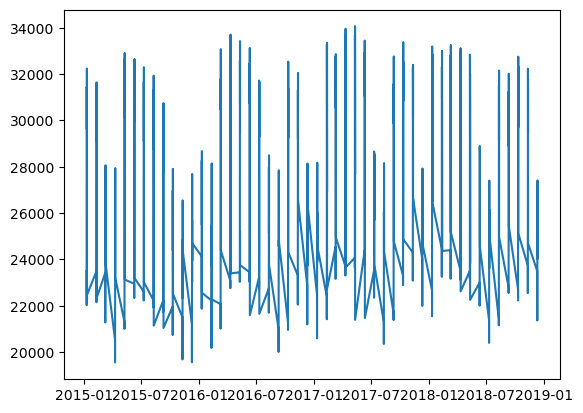

In [56]:
plt.plot(total_load_df['total load actual'][total_load_df.index.day == 10])